# Read Uploaded Input Data

In [1]:
import pandas as pd

sample_input = {
    'ip': ['103.166.156.31', '118.97.209.229', '147.139.187.40', '103.26.209.149', '']
}
df_input = pd.DataFrame(sample_input)
df_input.head()

,ip
0,103.166.156.31
1,118.97.209.229
2,147.139.187.40
3,103.26.209.149
4,


In [49]:
sample_input

{'ip': ['103.166.156.31',
  '118.97.209.229',
  '147.139.187.40',
  '103.26.209.149']}

In [2]:
df_input.ip.unique().tolist()

['103.166.156.31', '118.97.209.229', '147.139.187.40', '103.26.209.149', '']

# Read Database

In [3]:
df_master = pd.read_csv('dataset/dataset.csv')
df_master.head()

,host,cve_id,cvss,epss,percentile,ransomware,cisa_kev
0,103.166.156.31,CVE-2023-38408,9.8,0.04189,0.91250,0,0
1,103.166.156.31,CVE-2021-41617,7.0,0.00055,0.21154,0,0
2,103.166.156.31,CVE-2021-36368,3.7,0.00199,0.57661,0,0
3,103.166.156.31,CVE-2020-15778,7.8,0.00289,0.65524,0,0
4,103.166.156.31,CVE-2020-14145,5.9,0.00209,0.58646,0,0


# Query Data from Input to Database

In [16]:
import duckdb as db

try:
    df_model = db.sql(f"""
              SELECT 
                input_data.ip, 
                database.cve_id, 
                database.epss,
                database.cvss,
                database.ransomware,
                database.cisa_kev
              FROM
                df_input AS input_data
                LEFT JOIN
                  df_master AS database
                    ON input_data.host = database.host
              """).df()
except Exception as e: 
    print(e)

Binder Error: Table "input_data" does not have a column named "host"


In [10]:
df_model

,ip,cve_id,epss,cvss,ransomware,cisa_kev
0,103.166.156.31,CVE-2023-38408,0.04189,9.8,0.0,0.0
1,103.166.156.31,CVE-2021-41617,0.00055,7.0,0.0,0.0
2,103.166.156.31,CVE-2021-36368,0.00199,3.7,0.0,0.0
3,103.166.156.31,CVE-2020-15778,0.00289,7.8,0.0,0.0
4,103.166.156.31,CVE-2020-14145,0.00209,5.9,0.0,0.0
5,103.166.156.31,CVE-2019-6111,0.00201,5.9,0.0,0.0
6,103.166.156.31,CVE-2019-6110,0.00337,6.8,0.0,0.0
7,103.166.156.31,CVE-2019-6109,0.00174,6.8,0.0,0.0
8,103.166.156.31,CVE-2018-20685,0.00712,5.3,0.0,0.0
9,103.166.156.31,CVE-2018-15919,0.00273,5.3,0.0,0.0


In [37]:
df_input_temp = df_master[df_master.ip.isin(df_input.ip.unique().tolist())][['cve_id', 'epss', 'cvss', 'ransomware', 'cisa_kev']]
# df_input_temp = df_master[df_master.ip.isin(df_input.ip.unique().tolist())][['cve_id', 'epss', 'cvss']]
df_input_temp.head()

,cve_id,epss,cvss,ransomware,cisa_kev
0,CVE-2023-38408,0.04189,9.8,0,0
1,CVE-2021-41617,0.00055,7.0,0,0
2,CVE-2021-36368,0.00199,3.7,0,0
3,CVE-2020-15778,0.00289,7.8,0,0
4,CVE-2020-14145,0.00209,5.9,0,0


# Feature Engineering

## Standardization

In [38]:
df_input_temp.set_index('cve_id', inplace=True)
df_input_temp.head()

,epss,cvss,ransomware,cisa_kev
cve_id,,,,
CVE-2023-38408,0.04189,9.8,0,0
CVE-2021-41617,0.00055,7.0,0,0
CVE-2021-36368,0.00199,3.7,0,0
CVE-2020-15778,0.00289,7.8,0,0
CVE-2020-14145,0.00209,5.9,0,0


In [39]:
from sklearn.preprocessing import MinMaxScaler

standardize = MinMaxScaler()
data_std = pd.DataFrame(standardize.fit_transform(df_input_temp))
data_std.head()

,0,1,2,3
0,0.042761,1.000000,0.0,0.0
1,0.000000,0.540984,0.0,0.0
2,0.001489,0.000000,0.0,0.0
3,0.002420,0.672131,0.0,0.0
4,0.001593,0.360656,0.0,0.0


In [ ]:
# set number of clusters
# kclusters = 6
kclusters = (3,11)


model = KMeans(random_state=0)
# visualizer = KElbowVisualizer(model, k=kclusters, metric='calinski_harabasz', timings=False) # random state=0
visualizer = KElbowVisualizer(model, k=kclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(data_std)        # Fit the data to the visualizer
visualizer.show()

In [67]:
[str(cluster) for cluster in kmeans.labels_]

['2',
 '3',
 '0',
 '3',
 '0',
 '0',
 '3',
 '3',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '3',
 '0',
 '3',
 '0',
 '0',
 '3',
 '3',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1']

# Modeling

In [40]:
# Choose the number of clusters (k)
k = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(data_std)

# Get cluster assignments
df_input_temp['cluster'] = kmeans.labels_

/Users/diardanoraihan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [41]:
df_input_temp

,epss,cvss,ransomware,cisa_kev,cluster
cve_id,,,,,
CVE-2023-38408,0.04189,9.8,0,0,2
CVE-2021-41617,0.00055,7.0,0,0,3
CVE-2021-36368,0.00199,3.7,0,0,0
CVE-2020-15778,0.00289,7.8,0,0,3
CVE-2020-14145,0.00209,5.9,0,0,0
CVE-2019-6111,0.00201,5.9,0,0,0
CVE-2019-6110,0.00337,6.8,0,0,3
CVE-2019-6109,0.00174,6.8,0,0,3
CVE-2018-20685,0.00712,5.3,0,0,0


In [42]:
df_input_temp.sort_values(by=['cluster'])

,epss,cvss,ransomware,cisa_kev,cluster
cve_id,,,,,
CVE-2018-20685,0.00712,5.3,0,0,0
CVE-2021-36368,0.00199,3.7,0,0,0
CVE-2018-20685,0.00712,5.3,0,0,0
CVE-2016-20012,0.00369,5.3,0,0,0
CVE-2017-15906,0.00831,5.3,0,0,0
CVE-2018-15473,0.03247,5.3,0,0,0
CVE-2018-15919,0.00273,5.3,0,0,0
CVE-2019-6111,0.00201,5.9,0,0,0
CVE-2020-14145,0.00209,5.9,0,0,0


In [43]:
df_input_temp.reset_index(inplace=True)
df_input_temp.head()

,cve_id,epss,cvss,ransomware,cisa_kev,cluster
0,CVE-2023-38408,0.04189,9.8,0,0,2
1,CVE-2021-41617,0.00055,7.0,0,0,3
2,CVE-2021-36368,0.00199,3.7,0,0,0
3,CVE-2020-15778,0.00289,7.8,0,0,3
4,CVE-2020-14145,0.00209,5.9,0,0,0


In [54]:
df_input_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cve_id      28 non-null     object 
 1   epss        28 non-null     float64
 2   cvss        28 non-null     float64
 3   ransomware  28 non-null     int64  
 4   cisa_kev    28 non-null     int64  
 5   cluster     28 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 1.3+ KB


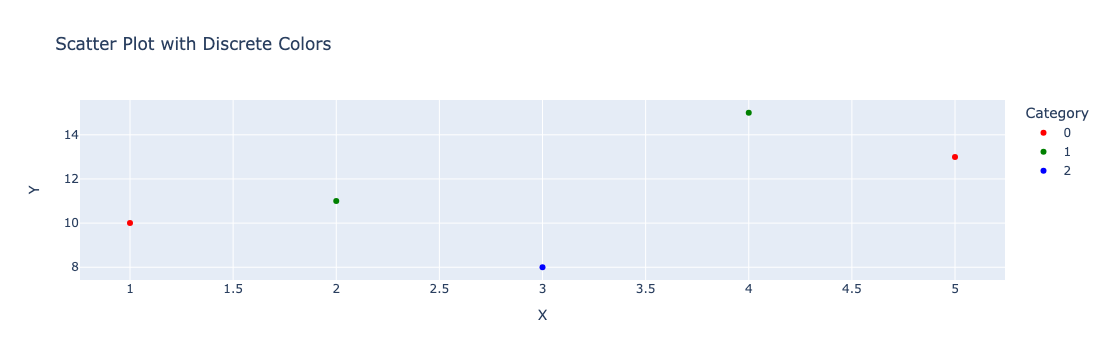

In [60]:
# Sample data
data = {'X': [1, 2, 3, 4, 5],
        'Y': [10, 11, 8, 15, 13],
        'Category': ['0','1', '2', '1', '0']}

df = pd.DataFrame(data)

# Define a color map for discrete colors
color_map = {'0': 'red', '1': 'green', '2': 'blue'}

# Create a scatter plot using Plotly Express with discrete colors
fig = px.scatter(df, x='X', y='Y', color='Category', color_discrete_map=color_map, title='Scatter Plot with Discrete Colors')

# Show the plot
fig.show()

In [44]:
df_input_temp.groupby('cluster').mean()

,epss,cvss,ransomware,cisa_kev
cluster,,,,
0,0.007551,5.25,0.0,0.0
1,0.967330,9.80,1.0,1.0
2,0.041890,9.80,0.0,0.0
3,0.002138,7.10,0.0,0.0


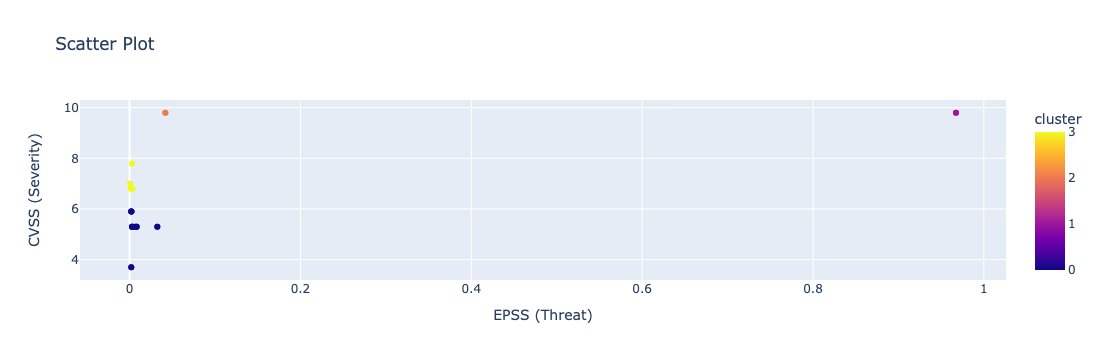

In [45]:
import plotly.express as px

# Create a scatter plot using Plotly Express
fig = px.scatter(df_input_temp, x='epss', y='cvss', color = 'cluster', title='Scatter Plot')
fig.update_xaxes(title_text='EPSS (Threat)')
fig.update_yaxes(title_text='CVSS (Severity)')

# Show the plot
fig.show()

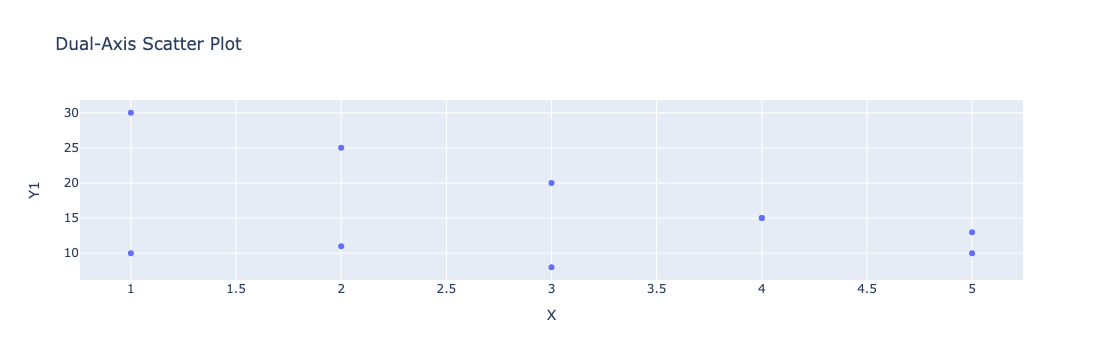

In [46]:
# Sample data
data = {
    'X': [1, 2, 3, 4, 5],
    'Y1': [10, 11, 8, 15, 13],
    'Y2': [30, 25, 20, 15, 10]
}


df = pd.DataFrame(data)

# Create a scatter plot with a dual Y-axis using Plotly Express
fig = px.scatter(df, x='X', y='Y1', title='Dual-Axis Scatter Plot')

# Add a second Y-axis
fig.add_trace(px.scatter(df, x='X', y='Y2').data[0])

# Update the layout to include a secondary Y-axis
fig.update_layout(
    yaxis2=dict(
        title='Y2 Axis',
        overlaying='y',
        side='right'
    )
)

# Show the plot
fig.show()

In [47]:
df_final = df_input_temp.groupby('cluster').mean()

In [48]:
df_final['final_score'] = (df_final['epss'] * df_final['cvss'])
df_final['rank'] = df_final['final_score'].rank(ascending=False)
df_final

,epss,cvss,ransomware,cisa_kev,final_score,rank
cluster,,,,,,
0,0.007551,5.25,0.0,0.0,0.039644,3.0
1,0.967330,9.80,1.0,1.0,9.479834,1.0
2,0.041890,9.80,0.0,0.0,0.410522,2.0
3,0.002138,7.10,0.0,0.0,0.015176,4.0
